#                              Risk Profiling
###                       BM2033: Probability and Random Variables
Anirudh Srinivasan (CS20BTECH11059)

# Importing Libraries

In [60]:
# Importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

## Initializing the measured temperature values and other parameters of the error distributions

This generates Normal Distributions for error for temperatures in 'temp_range' with intervals of 'interval'
1. temp_range = 0 to 'x' deg C

2. measured_temp: It stores all the measured temperature values

3. values_per_marking: For each marking in the graph, how much values are considered

4. temp_err_sigma: It stores the Standard Deviation of all Error Distributions for each value of temperature

In [61]:
temp_range = 47
interval = 0.5
values_per_marking = pow(10, 6)
sig_low = 0.2
sig_high = 0.4
tmp_rnge_interval = (int) (temp_range / interval)

measured_temp = [[] for x in range(tmp_rnge_interval + 1)] 
temp_err_sigma = [] # stores sd of all temperature's error distributions
for i in range(tmp_rnge_interval + 1):
    mu = i/2
    sigma = random.uniform(sig_low, sig_high)
    temp_err_sigma.append(sigma)
    measured_temp[i] = np.random.normal(mu, sigma, values_per_marking)

## Error Distribution Plotter for Particular Temperature

In [62]:
# Function to plot error distribution for a particular temperature 'x'
def plot_hist_x(x):
  """
    Input: Given a temperature x
    Output: Plots the error distribution for the temperature 'x'
  """
  plt.hist(measured_temp[2 * x], bins = 1000, density = True, label = "Distribution of {}".format(x), histtype = "step")
  plt.legend()
  plt.show()

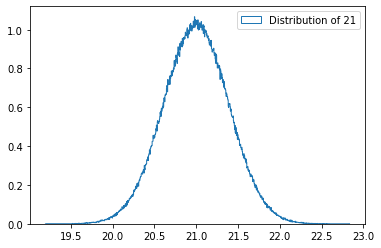

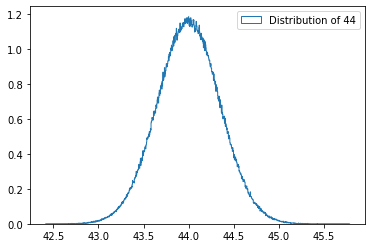

In [69]:
# Plotting error distributions for certain values of temperatures
plot_hist_x(21)
plot_hist_x(44)

## Probability Distribution of Error

It returns the probability distribution of error

1. prob_err: It holds the probabilities of error



In [64]:
# Probability Distribution of Error
def prob_err_dist():
  """
    Input: No input parameter
    Output: It returns the probabilities of error
  """
  prob_err = []  
  for i in range(tmp_rnge_interval + 1):
    count = 0
    for j in range(values_per_marking):
        if ((measured_temp[i][j] > (i/2 + interval)) or (measured_temp[i][j] < (i/2 - interval))):
            count = count + 1
    prob_err.append(count/values_per_marking)
  return prob_err

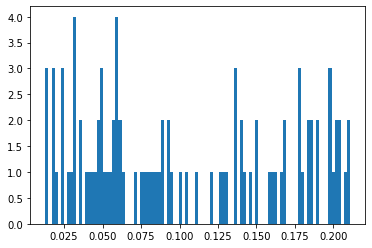

In [65]:
# Plotting the Probability Distribution of Error

prob_err_dist = prob_err_dist()
plt.hist(prob_err_dist, bins = 100)
plt.show()

## Setting values to define Mid-range and End-ranges

In [66]:
# Setting Variables

low = 1
mid_1 = 4
mid_2 = 7
high = 10

mid_range_low = (int) (((mid_1 - low)/ (high - low)) * tmp_rnge_interval)
mid_range_high = (int) (((mid_2 - low)/ (high - low)) * tmp_rnge_interval)

end_range_low = (int) (((low)/ (high - low)) * tmp_rnge_interval)
end_range_high = (int) (((mid_2)/ (high - low)) * tmp_rnge_interval)

## Calculating Probability of occurence of a true temperature and the associated cost of error for each temperature

1. true_temp_prob: It stores the probability of a true temperature occurring

2. error_cost: It stores the cost of error for each temperature

The fundamental idea is more probability is assigned to temperatures in the mid-range and drops out gradually towards the end while more cost is assigned for errors at extremes or end-range and drops gradually as we move towards the centre (mid-range)

In [67]:
# Initializing Variables
true_temp_prob = [0 for x in range(tmp_rnge_interval + 1)]  
err_cost = [0 for x in range(tmp_rnge_interval + 1)]   

# Assigning Probability of Occurence of True Temperatures
for i in range(tmp_rnge_interval + 1):
    if i >= mid_range_low and i <= mid_range_high:
        true_temp_prob[i] = random.uniform(mid_2, high)     
    elif i < end_range_low or i > end_range_high:
        true_temp_prob[i] = random.uniform(low, mid_1) 
    else:
        true_temp_prob[i] = random.uniform(mid_1, mid_2)

# Sum of True Temp Probabilities
sum = 0
for i in range(tmp_rnge_interval + 1):
    sum = sum + true_temp_prob[i]

# Normalizing the probabilities to make them sum up to 1
for i in range(tmp_rnge_interval + 1):         
    true_temp_prob[i] = true_temp_prob[i] / sum

# Assigning Cost of Error for each temperature
for i in range(tmp_rnge_interval + 1):
    if i >= mid_range_low and i <= mid_range_high:
        err_cost[i] = random.uniform(low, mid_1)   
    elif i < end_range_low or i > end_range_high:
        err_cost[i] = random.uniform(mid_2, high)    
    else:                                 
        err_cost[i] = random.uniform(mid_1, mid_2)

## Calculating the Probability of Occurence of Error and the Expected Cost

In [68]:
# Probability of Occurence of Error
prob_err = 0
for i in range(tmp_rnge_interval + 1):
    prob_err = prob_err + prob_err_dist[i] * true_temp_prob[i]
print("Probality of Occurence of an Error: {}".format(prob_err))

# Expected Cost
exp_cost = 0
for i in range(tmp_rnge_interval + 1):
    exp_cost = exp_cost + prob_err_dist[i] * true_temp_prob[i] * err_cost[i]
print("Expected Cost: {}".format(exp_cost))

Probality of Occurence of an Error: 0.1027725405657727
Expected Cost: 0.46484271933344895
